In [1]:
from importlib import reload

In [2]:
import env
import sys
import os
import itertools
import source
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm
import matplotlib.gridspec

In [3]:
import sklearn.model_selection
import sklearn.linear_model
import sklearn.metrics

In [4]:
reload(source)

<module 'source' from '/Users/luciancooper/repos/bbmodels/source.py'>

# Plot

In [12]:
def plot_logistic_regression_metrics(model, X_test, y_test, title=None, cmap='YlGnBu'):
    # make prediction
    y_pred = model.predict(X_test)
    # confusion matrix
    cnf_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
    # get accuracy, precision, recall scores
    scores = [
        sklearn.metrics.accuracy_score(y_test, y_pred),
        sklearn.metrics.precision_score(y_test, y_pred),
        sklearn.metrics.recall_score(y_test, y_pred),
    ]
    # roc curve
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = sklearn.metrics.roc_curve(y_test,  y_pred_proba)
    auc = sklearn.metrics.roc_auc_score(y_test, y_pred_proba)
    # create figure
    fig, axs = plt.subplots(1,3, figsize=(12,4), tight_layout=True)
    if title:
        fig.suptitle(title, fontsize=16)
    # get color map
    cmscale = getattr(matplotlib.cm, cmap)
    # plot confusion matrix
    im = axs[0].imshow(cnf_matrix, cmap=cmap)
    axs[0].set_xticks(np.arange(2))
    axs[0].set_yticks(np.arange(2))
    axs[0].set_xticklabels([0,1])
    axs[0].set_yticklabels([0,1])
    axs[0].set_xticks(np.arange(3)-0.5, minor=True)
    axs[0].set_yticks(np.arange(3)-0.5, minor=True)
    #axs[0].grid(which='minor', color='black', linestyle='-', linewidth=1)
    axs[0].tick_params(which='minor', bottom=False, left=False)
    axs[0].set_ylabel('Actual', fontsize=13)
    axs[0].set_xlabel('Predicted', fontsize=13)
    axs[0].set_title('Confusion Matrix', fontsize=15)
    # annotate confusion matrix
    cnf_min = cnf_matrix.min()
    cnf_max = cnf_matrix.max()
    for i,j in itertools.product([0, 1],[0, 1]):
        rgb = cmscale((cnf_matrix[i, j]-cnf_min)/(cnf_max-cnf_min))
        # yiq contrast value
        yiq = (np.array([int(x*255) for x in rgb[:3]])*np.array([299,587,114])).sum()/1000
        # annotate square
        text = im.axes.text(j, i, cnf_matrix[i, j], 
                            horizontalalignment='center',
                            verticalalignment='center',
                            color=('black' if yiq >= 150 else 'white'),
                            fontsize=18,
                            family='monospace')
    
    # plot score metrics table
    axs[1].axis('off')
    table = axs[1].table(
        cellText=np.array([*zip(['Accuracy','Precision','Recall'], ['{:.10f}'.format(x) for x in scores])], dtype=str),
        bbox=[0, 0.25, 1, 0.5],
        cellLoc='left',
        loc='center'
    )
    table.auto_set_font_size(False)
    table.set_fontsize(14)
    for k, cell in table._cells.items():
        cell.set_text_props(fontfamily='monospace')
        cell.set_edgecolor('#bbbbbb')
        if k[1]==0:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor('#40466e')
    
    # plot roc curve
    axs[2].plot(fpr,tpr,label="data 1, auc="+str(auc))
    axs[2].legend(loc=4)
    # show plot
    plt.show()


## Import Dataset

In [5]:
datasets = source.allFeatures()

In [6]:
print('['+']['.join(datasets[20].columns)+']')

[gid][team][gameNumber][home][spread][pn][dn][win][win_rate][expected_win][log5][lob_rate][win_vs_rate][scored_vs_rate][e][ba][slg][obp][ops][rbi][bb][era][k][pbb][ptb][phits]


# Logistic Regression

In [13]:
def test_features(x):
    for period,dataset in datasets.items():
        data = dataset[x+['win']].dropna()
        X = data[x].values
        y = data['win']
        X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.25, random_state=0)
        logreg = sklearn.linear_model.LogisticRegression(solver='lbfgs')
        logreg.fit(X_train, y_train)
        plot_logistic_regression_metrics(logreg, X_test, y_test,title=f'Period {period}')

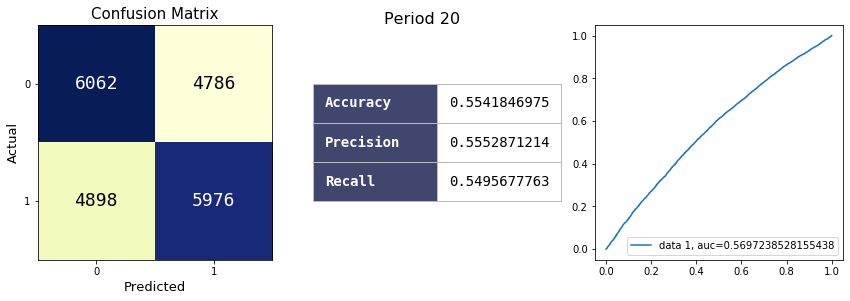

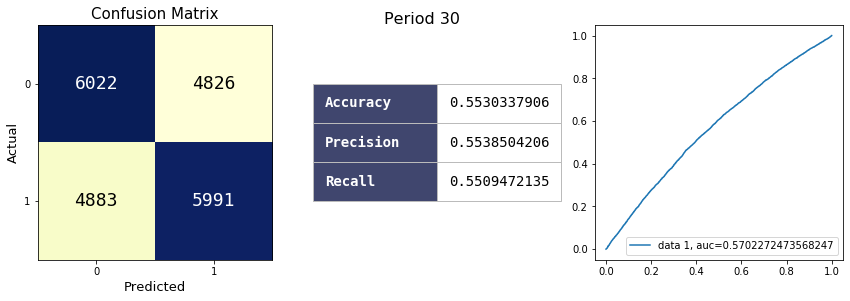

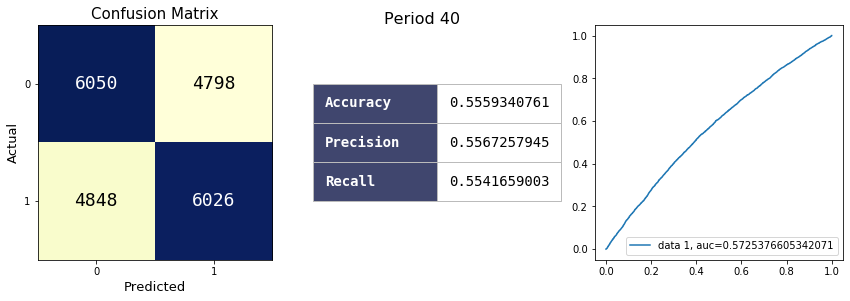

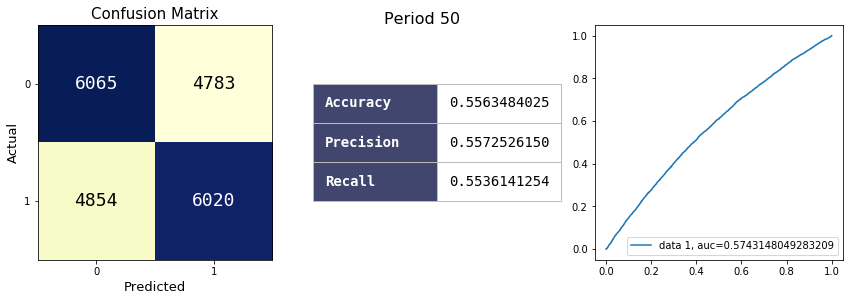

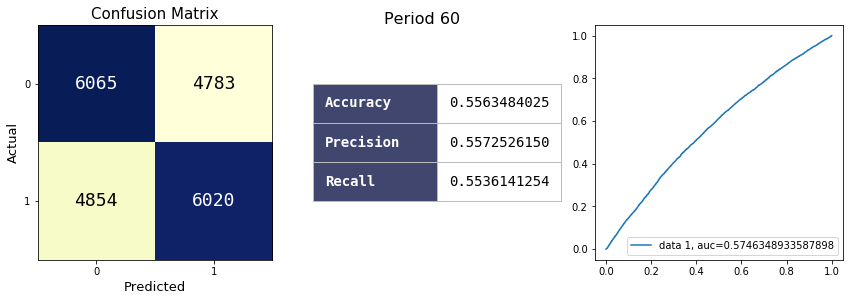

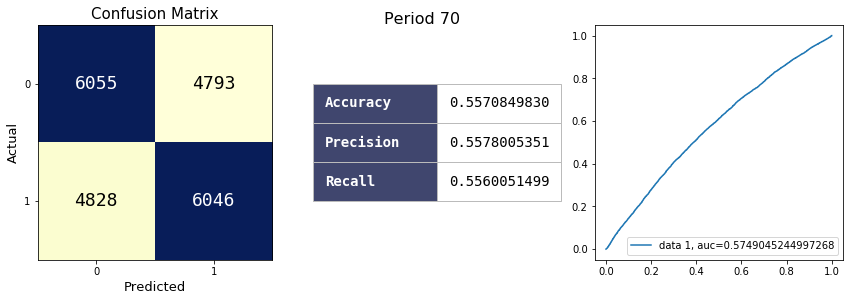

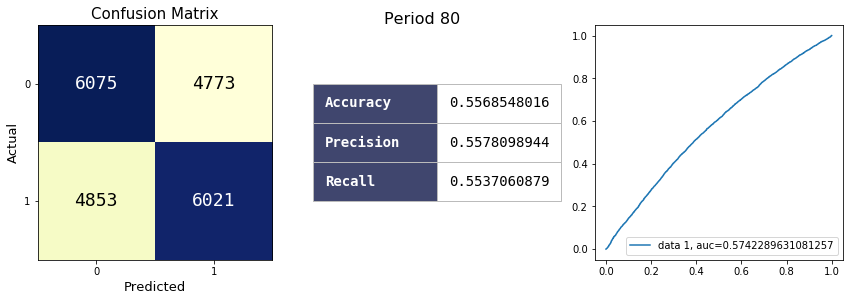

In [14]:
test_features(['home','ops','e','log5'])

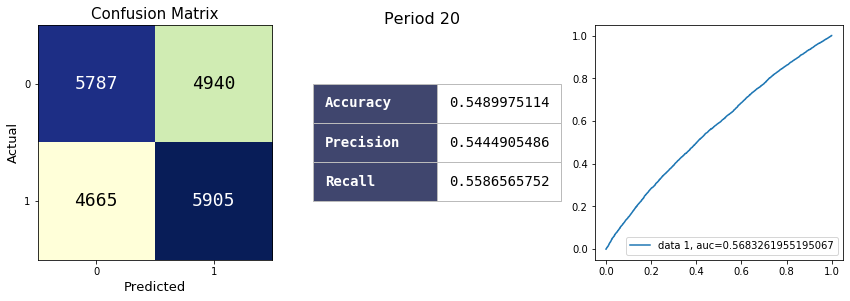

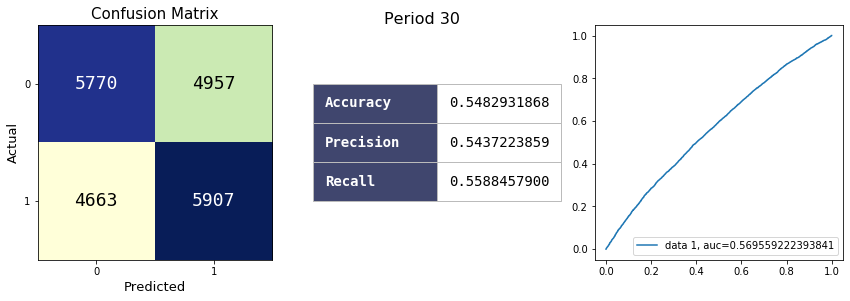

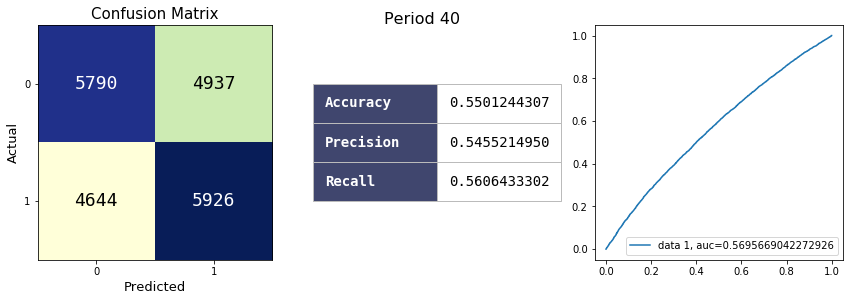

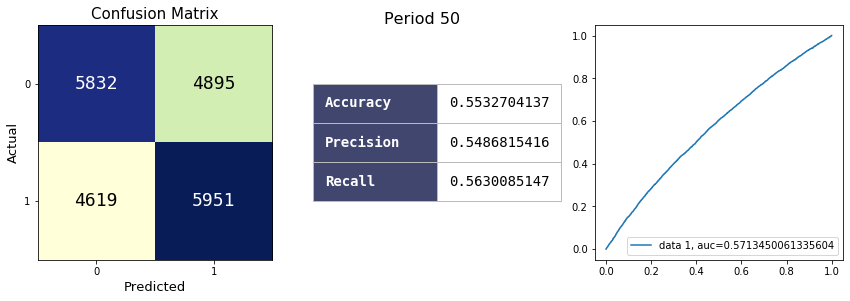

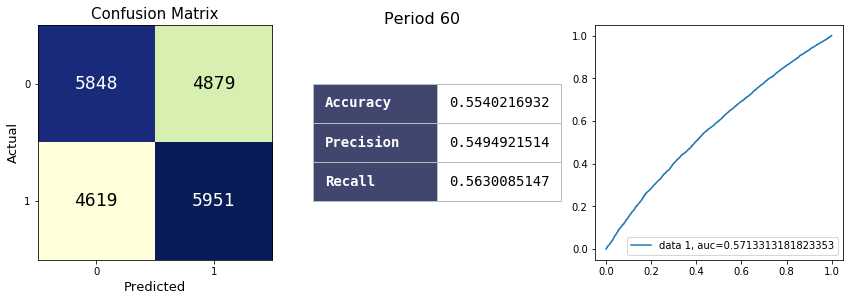

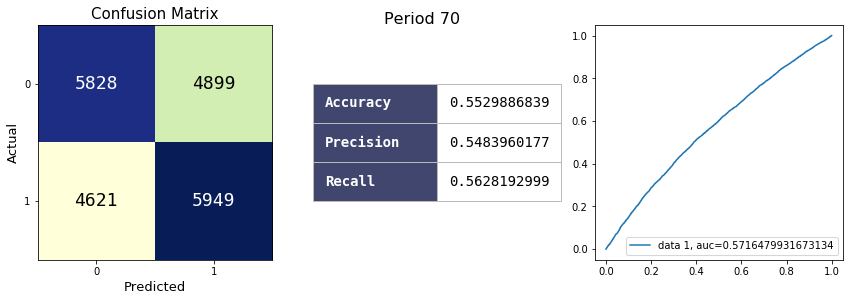

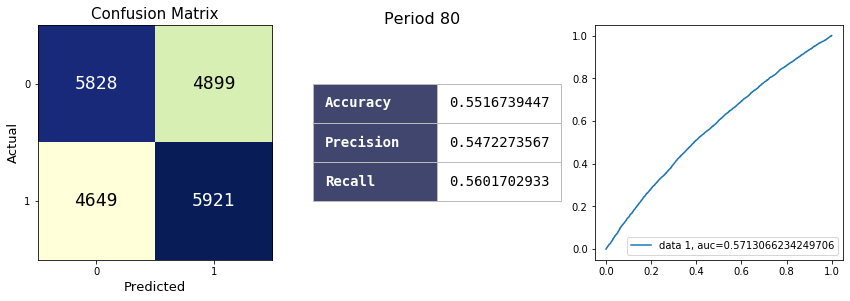

In [16]:

test_features(['log5', 'home', 'k', 'pbb', 'ptb', 'slg', 'expected_win'])